In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config  import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/FinalONEATTraining/EverydayTrainingData/'
npz_name = 'divisionsmallbin2m4.npz'
npz_val_name = 'divisionbin2m4val.npz'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/Everydayneatmodel/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'divisionbin2d56m4.h5'

In [3]:
division_categories_json = model_dir + 'DivisionCategories.json'
key_categories = load_json(division_categories_json)
division_cord_json = model_dir + 'DivisionCord.json'
key_cord = load_json(division_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
lstm_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 56
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 2
# use softmax for single event per box, sigmoid for multi event per box
lstm_hidden_unit = 16
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True

size_tminus = 4
size_tplus = 5
imagex = 64
imagey = 64

In [4]:
config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, nboxes = nboxes, imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         lstm_kernel = lstm_kernel, lstm_hidden_unit = lstm_hidden_unit, show = show,
                         startfiler = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=2, box_vector=5, categories=2, depth=65, epochs=250, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1}, key_cord={'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4}, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='divisionsmallbin2d65m4.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/FinalONEATTraining/Everydayoneatsmallbin2/', npz_name='divisionsmallbin2m4.npz', npz_val_name='divisionsmallbin2m4val.npz', residual=False, show=True, size_tminus=4, size_tplus=5, start_kernel=3, startfilter=48, stride=4, yolo_v0=True, yolo_v1=False, yolo_v2=False)


number of  images:	 14691
image size (3D):		 (10, 64, 64)
axes:				 STXYC
channels in / out:		 1
number of  images:	 774
image size (3D):		 (10, 64, 64)
axes:				 STXYC
channels in / out:		 1
5
(14691, 1, 1, 7) 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, None, Non 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 10, None, Non 480         input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 10, None, Non 1344        input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 10, None, Non 192         time_distributed_1[0][0]         
____________________________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 14691 samples, validate on 774 samples
Epoch 1/250
14691/14691 [==============================] - 2647s 180ms/step - loss: 2.4814 - accuracy: 0.7967 - val_loss: 2.4852 - val_accuracy: 0.7752

Epoch 00001: saving model to /home/sancere/Kepler/FinalONEATTraining/Everydayneatmodel/divisionsmallbin2d65m4.h5


<Figure size 432x288 with 0 Axes>

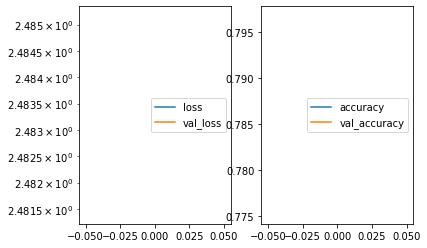

Predicted cell: Division Probability: [[0.8128226]]
True Cell type: Division
x [[0.5018302]]
True positional value x 0.5
y [[0.50306493]]
True positional value y 0.5
t [[0.44241494]]
True positional value t 0.4444444444444444
h [[0.27048242]]
True positional value h 0.296875
w [[0.2962373]]
True positional value w 0.375


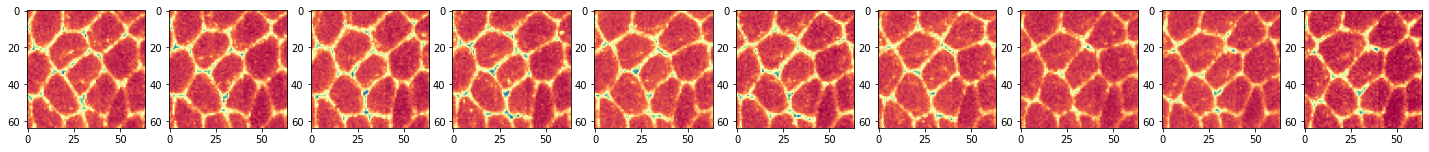

Epoch 2/250
 8256/14691 [===============>..............] - ETA: 18:56 - loss: 2.4204 - accuracy: 0.7926

KeyboardInterrupt: 

In [5]:
Train = NEATDynamic(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()
